In [ ]:
# !pip install krippendorff

In [1]:
import pandas as pd
import json
import glob

## Leitura dos dados

In [2]:
feedbacks = []
for name in glob.glob('./export*/*.json'):
    with open(name, "r") as feedback:
        feedbacks += json.load(feedback)
feedbacks = pd.DataFrame(feedbacks)

def change_corresponding(row):
    for elem in row["corresponding"]:
        elem["query"] = row["text"]
        elem["query_id"] = row["_id"]
    return row["corresponding"]
feedbacks["corresponding"] = feedbacks.apply(lambda row: change_corresponding(row) ,axis=1)

feedbacks = pd.json_normalize(feedbacks.explode("corresponding")["corresponding"])
feedbacks = feedbacks[feedbacks["labels"].apply(lambda x: bool(x))]
feedbacks["label"] = feedbacks["labels"].apply(lambda x: 1 if x[0]["label"]["name"] == "Relevante" else 0)
feedbacks["query"] = feedbacks["query"].apply(lambda x: x.replace("CONSULTA: ", ""))
feedbacks

,text,_id,labels,query,query_id,label
300,\n\nDocumento:20000110607\n\n\n\n\nPoder Judic...,72ie2H0BazwYFyie8dgm,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
301,\n\nDocumento:20000006496\n\n\n\n\nPoder Judic...,B2eH2H0BazwYFyieir4V,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
302,\n\nDocumento:20000085491\n\n\n\n\nPoder Judic...,J2if2H0BazwYFyiel-E3,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
303,\n\nDocumento:20000020010\n\n\n\n\nPoder Judic...,rmmo2H0BazwYFyienEO8,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
304,\n\nDocumento:20000006495\n\n\n\n\nPoder Judic...,BmeH2H0BazwYFyieir4V,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
...,...,...,...,...,...,...
611,\n\n\nDocumento:20000078408\n\n\n\n\nPoder Jud...,mmeC2H0BazwYFyie9Ii0,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,incidente de desconsideração da personalidade,912894da-608d-4bf1-83a8-f43934bb81f8,1
612,\n\nDocumento:20000023103\n\n\n\n\nPoder Judic...,MGmp2H0BazwYFyie3VLd,[{'label': {'id': '791b77df-7956-41b6-8442-5ec...,padrão de vida do alimentando,06b31304-b1bf-4d89-af61-d1d61904afe0,0
613,\n\n\nDocumento:20000075369\n\n\n\n\nPoder Jud...,cGmk2H0BazwYFyielhYX,[{'label': {'id': '791b77df-7956-41b6-8442-5ec...,padrão de vida do alimentando,06b31304-b1bf-4d89-af61-d1d61904afe0,0
614,\n\nDocumento:20000092359\n\n\n\n\nPoder Judic...,qWmk2H0BazwYFyieDhH1,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,padrão de vida do alimentando,06b31304-b1bf-4d89-af61-d1d61904afe0,1


In [3]:
feedbacks[["text", "query", "label"]]

,text,query,label
300,\n\nDocumento:20000110607\n\n\n\n\nPoder Judic...,planos de saúde,1
301,\n\nDocumento:20000006496\n\n\n\n\nPoder Judic...,planos de saúde,1
302,\n\nDocumento:20000085491\n\n\n\n\nPoder Judic...,planos de saúde,1
303,\n\nDocumento:20000020010\n\n\n\n\nPoder Judic...,planos de saúde,1
304,\n\nDocumento:20000006495\n\n\n\n\nPoder Judic...,planos de saúde,1
...,...,...,...
611,\n\n\nDocumento:20000078408\n\n\n\n\nPoder Jud...,incidente de desconsideração da personalidade,1
612,\n\nDocumento:20000023103\n\n\n\n\nPoder Judic...,padrão de vida do alimentando,0
613,\n\n\nDocumento:20000075369\n\n\n\n\nPoder Jud...,padrão de vida do alimentando,0
614,\n\nDocumento:20000092359\n\n\n\n\nPoder Judic...,padrão de vida do alimentando,1


## Análise

In [48]:
scores = feedbacks.groupby(["_id", "query_id"])["label"].mean().to_frame()
scores["count"] = feedbacks.groupby(["_id", "query_id"])["label"].count()
scores

,,label,count
_id,query_id,,
-2d92H0BazwYFyieslD-,b4bb355d-e105-4b58-9bd1-c4421b89a058,1.0,1
-2id2H0BazwYFyiewsrT,40456087-473f-44f4-9aeb-6b8a61205c20,1.0,1
02eE2H0BazwYFyie_Z-f,515c91af-935b-44a0-9034-2c067e06d796,0.0,1
0meK2H0BazwYFyieed7Q,a2f20a89-329a-4781-9ac3-80b3e1df8a93,1.0,1
0mie2H0BazwYFyiewte9,c23885c7-1118-4c1f-9a88-509b817e629d,1.0,1
...,...,...,...
zGmj2H0BazwYFyie5Q7v,d630e749-49cc-468e-a974-5f8cf9e609cc,1.0,1
zWeB2H0BazwYFyieX3dP,b4bb355d-e105-4b58-9bd1-c4421b89a058,1.0,1
zWid2H0BazwYFyielMjT,38ff53de-7e90-4dbb-b912-40a8c8c63de4,0.0,1


In [49]:
scores["label"].value_counts()

0.0    149
1.0     67
0.5     18
Name: label, dtype: int64

<AxesSubplot:>

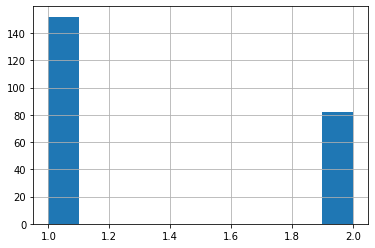

In [50]:
scores["count"].hist()

### Apenas entradas com todos os rótulos

In [51]:
all_scores = scores[scores["count"] == 2]

<AxesSubplot:>

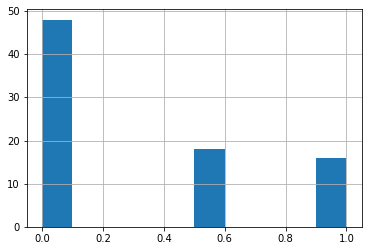

In [52]:
all_scores["label"].hist()

In [53]:
all_scores["label"].value_counts()

0.0    48
0.5    18
1.0    16
Name: label, dtype: int64

In [54]:
print("Observed agreement: ", 1 - (len([i for i in list(all_scores["label"]) if i == 0.5]) / len(all_scores)))

Observed agreement:  0.7804878048780488


# Inter-rater agreement


* Fleiss’s Kappa is an extension of Cohen’s kappa for three raters or more. In addition, the assumption with Cohen’s kappa is that your raters are deliberately chosen and fixed. With Fleiss’ kappa, the assumption is that your raters were chosen at random from a larger population.

* Kendall’s Tau is used when you have ranked data, like two people ordering 10 candidates from most preferred to least preferred.

* Krippendorff’s alpha is useful when you have multiple raters and multiple possible ratings.

### Kappas

In [42]:
scores = feedbacks.groupby(["_id", "query_id"])["label"].apply(list).to_frame()
scores["count"] = feedbacks.groupby(["_id", "query_id"])["label"].count()
all_scores = scores[scores["count"] == 2]

In [43]:
rater1 = [i[0] for i in list(all_scores["label"])]
rater2 = [i[1] for i in list(all_scores["label"])]

In [44]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(rater1, rater2)

0.4878556557945871

In [45]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1400/1*mHB6Ciljb4OnOacNWgc0aw.png')

### Krippendorff

In [191]:
feedbacks["entry"] = feedbacks.apply(lambda row: row["_id"] + row["query_id"] ,axis=1)
feedbacks["user"] = feedbacks["labels"].apply(lambda x: x[0]["user"]["id"])
feedbacks.head(3)

,text,_id,labels,query,query_id,label,user,entry
300,\n\nDocumento:20000110607\n\n\n\n\nPoder Judic...,72ie2H0BazwYFyie8dgm,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1,01c719b5-ec9b-481a-b8a4-76e85867e599,72ie2H0BazwYFyie8dgm001404da-7082-4c96-8300-dd...
301,\n\nDocumento:20000006496\n\n\n\n\nPoder Judic...,B2eH2H0BazwYFyieir4V,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1,01c719b5-ec9b-481a-b8a4-76e85867e599,B2eH2H0BazwYFyieir4V001404da-7082-4c96-8300-dd...
302,\n\nDocumento:20000085491\n\n\n\n\nPoder Judic...,J2if2H0BazwYFyiel-E3,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1,01c719b5-ec9b-481a-b8a4-76e85867e599,J2if2H0BazwYFyiel-E3001404da-7082-4c96-8300-dd...


In [196]:
f[f["user"] == user].iloc[0]["label"]

1

In [198]:
import random
users_strings = {}

for user in feedbacks["user"].unique():
    users_strings[user] = []

for entry in feedbacks["entry"].unique():
    f = feedbacks[feedbacks["entry"] == entry]
    for user in feedbacks["user"].unique():
        if user in list(f["user"]):
            users_strings[user] += [f[f["user"] == user].iloc[0]["label"]]
        else:
            users_strings[user] += [np.nan]

reliability_data = list(users_strings.values())
np.array(reliability_data).dtype.kind
value = krippendorff.alpha(reliability_data=reliability_data, value_domain=[0, 1])
print("Krippendorff's alpha: ", value)

Krippendorff's alpha:  0.48526315789473684


## Criação do dataset

In [11]:
scores["label"] = scores["label"].apply(lambda x: int(bool(x)))

In [12]:
scores.reset_index()

,_id,query_id,label,count
0,-2d92H0BazwYFyieslD-,b4bb355d-e105-4b58-9bd1-c4421b89a058,1,1
1,-2id2H0BazwYFyiewsrT,40456087-473f-44f4-9aeb-6b8a61205c20,1,1
2,02eE2H0BazwYFyie_Z-f,515c91af-935b-44a0-9034-2c067e06d796,0,1
3,0meK2H0BazwYFyieed7Q,a2f20a89-329a-4781-9ac3-80b3e1df8a93,1,1
4,0mie2H0BazwYFyiewte9,c23885c7-1118-4c1f-9a88-509b817e629d,1,1
...,...,...,...,...
229,zGmj2H0BazwYFyie5Q7v,d630e749-49cc-468e-a974-5f8cf9e609cc,1,1
230,zWeB2H0BazwYFyieX3dP,b4bb355d-e105-4b58-9bd1-c4421b89a058,1,1
231,zWid2H0BazwYFyielMjT,38ff53de-7e90-4dbb-b912-40a8c8c63de4,0,1
232,zWie2H0BazwYFyie8dkn,06b31304-b1bf-4d89-af61-d1d61904afe0,1,2
